In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.signal import wiener

In [3]:
alphawave = np.loadtxt("alphawave.csv")
sensors = np.loadtxt("sensor_background_noise.csv", delimiter=",")
with open("config.json") as f:
    config = json.load(f)

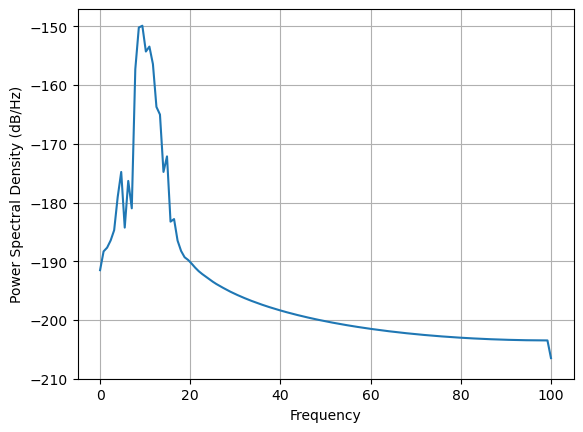

In [4]:
plt.psd(alphawave, Fs=config["samplerate_hz"]);

In [5]:
10**(-120/20)

1e-06

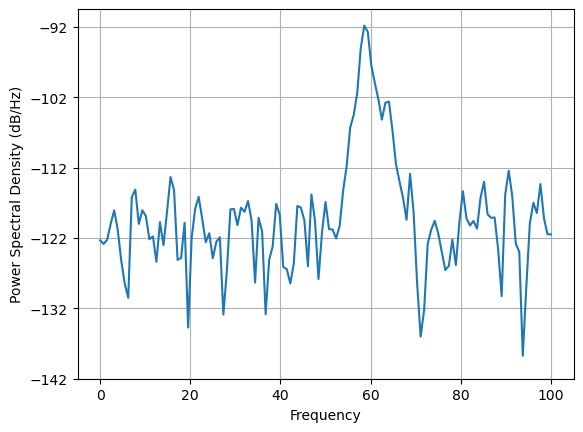

In [6]:
plt.psd(sensors[:,0], Fs=config["samplerate_hz"]);

In [7]:
sensor_data = {}
for i in range(config["n_sensors"]):
    sensor_data[f"sensor_noise_{i}"] = sensors[:,i]
    sensor_data[f"sensor_{i}"] = sensors[:,i]+alphawave
sensor_data["original_signal"] = alphawave
df = pd.DataFrame(sensor_data)

In [8]:
# plt.plot(alphawave)

In [9]:
# plt.plot(sensors.sum(axis=1)/config["n_sensors"])

In [10]:
# for i in range(config["n_sensors"]):
#     plt.figure()
#     plt.plot(df[f"sensor_{i}"])

In [11]:
fs = config["samplerate_hz"]
duration = config["duration_sec"]

n_samples = duration*fs

avg_noise = 100e-12
peak_value = 60000e-12
f = np.linspace(0,2*fs, n_samples+1)
p = peak_value*np.exp(-1*np.abs(f-60)) + avg_noise


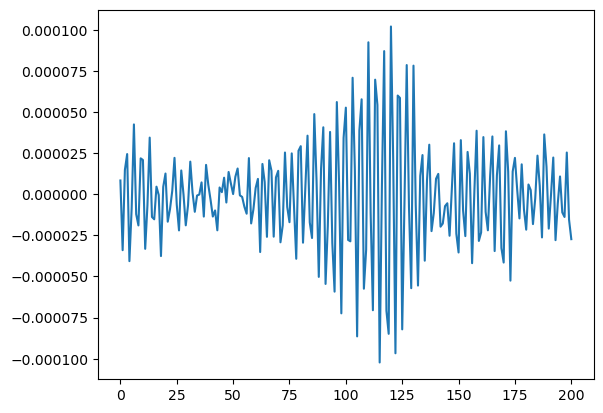

In [12]:
signal = np.array(df["sensor_0"])
signal

plt.plot(signal)

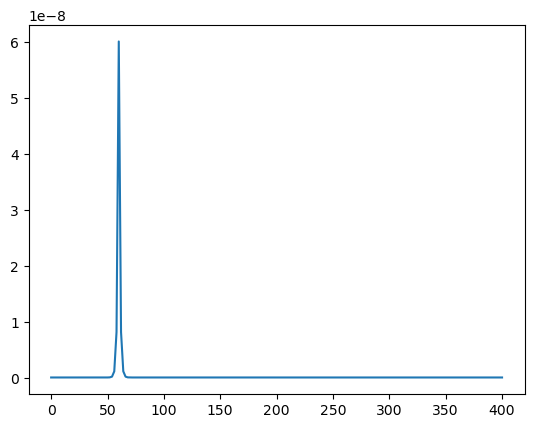

In [13]:
plt.plot(f, p)

In [14]:
10**(-94/10)

3.9810717055349694e-10

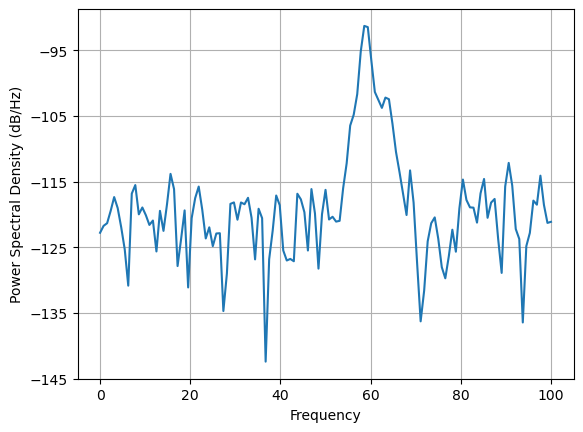

In [15]:
signal_noise = np.loadtxt("sensor_background_noise.csv", delimiter=",")
# plt.psd(signal_noise[:,1], Fs=config["samplerate_hz"]);
signal_noise.shape
signal_noise[:,1]
sxx,fx = plt.psd(signal_noise[:,1], Fs=config["samplerate_hz"]);


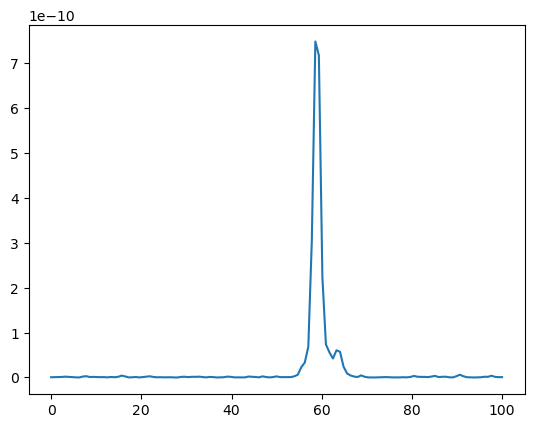

In [16]:
plt.plot(fx, sxx)

In [17]:
10**(-93/20)

2.238721138568338e-05

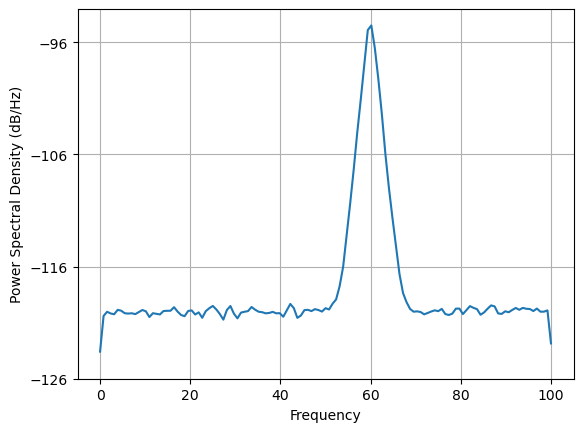

In [18]:
test = np.loadtxt("noise.csv")
plt.psd(test,Fs=200);

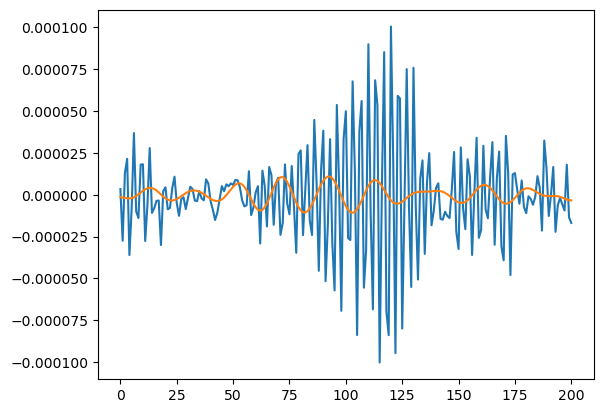

In [19]:
filtered  = wiener(signal, noise=p)
# for i in range(8):
#     filtered  = wiener(filtered, noise=p)
plt.plot(filtered)
plt.plot(alphawave*100)